In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import keras 
from keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import tensorflow as tf
#from sklearn.metrics import confusion_matrix 
import seaborn as sns 
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass
from keras.optimizers import SGD, Adam

np.random.seed(0) 

In [4]:
fashion_train = pd.read_csv('fashion-mnist_train.csv' , delimiter = ',')
fashion_test = pd.read_csv('fashion-mnist_test.csv' , delimiter =',')

In [5]:
print(fashion_train.shape)
print(fashion_test.shape)
print(set(fashion_train['label']))
print([fashion_train.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train.drop(labels='label', axis=1).max(axis=1).max()])

(60000, 785)
(10000, 785)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
[0, 255]


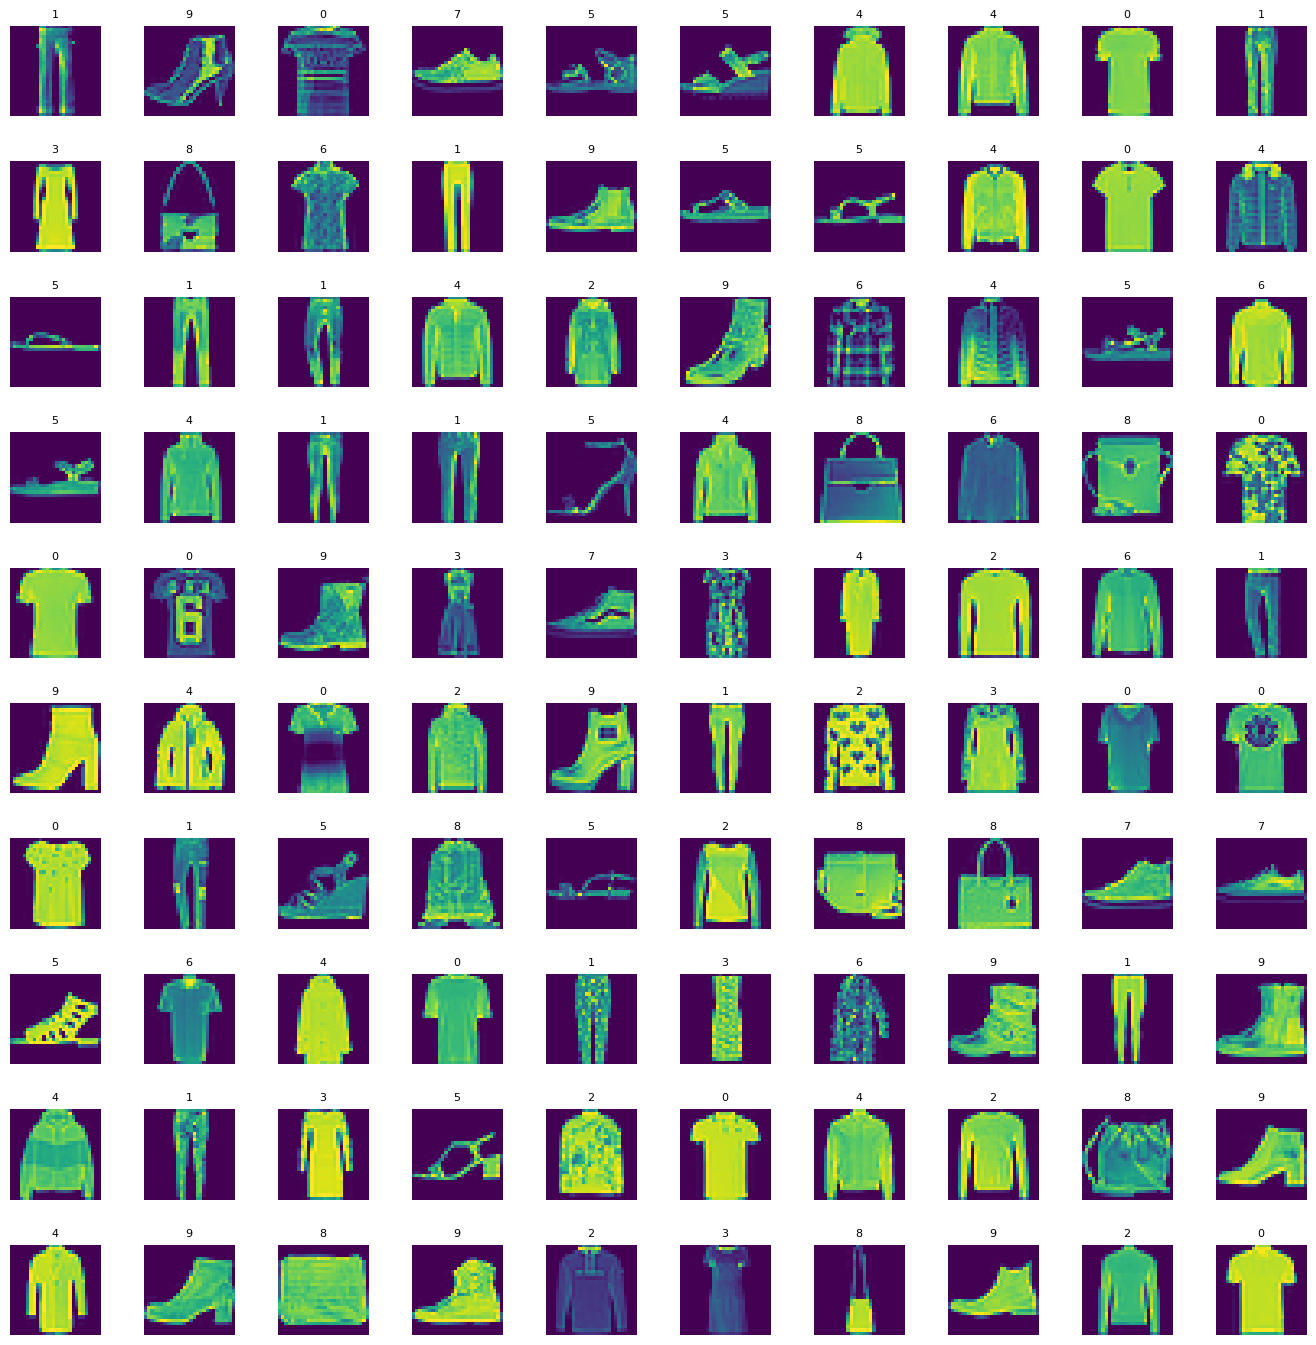

In [6]:
training = np.asarray(fashion_train, dtype='float32')


height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [7]:
x_train = np.genfromtxt('train_images.csv', delimiter=',', dtype=float)
y_train = np.genfromtxt('train_labels.csv', delimiter=',', dtype=int)

x_test = np.genfromtxt('test_images.csv', delimiter=',', dtype=float)
y_test = np.genfromtxt('test_labels.csv', delimiter=',', dtype=int)

In [8]:
x_train = np.genfromtxt('train_images.csv', delimiter=',', dtype=float, skip_header=1)
y_train = np.genfromtxt('train_labels.csv', delimiter=',', dtype=float, skip_header=1)
x_test = np.genfromtxt('test_images.csv', delimiter=',', dtype=float, skip_header=1)
y_test = np.genfromtxt('test_labels.csv', delimiter=',', dtype=float, skip_header=1)


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [10]:
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

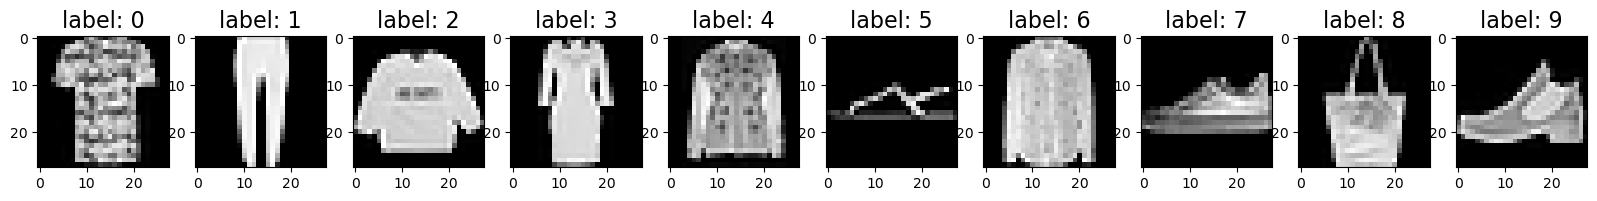

In [11]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes) :
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("label: {}".format(i), fontsize=16)

In [12]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [15]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)



Training model with SGD with Momentum:
Epoch 1/20
165/165 [==============================] - 7s 22ms/step - loss: 0.8719 - accuracy: 0.7021 - val_loss: 0.5829 - val_accuracy: 0.7968
Epoch 2/20
165/165 [==============================] - 2s 15ms/step - loss: 0.5152 - accuracy: 0.8197 - val_loss: 0.5695 - val_accuracy: 0.7926
Epoch 3/20
165/165 [==============================] - 2s 12ms/step - loss: 0.4670 - accuracy: 0.8346 - val_loss: 0.4695 - val_accuracy: 0.8347
Epoch 4/20
165/165 [==============================] - 2s 13ms/step - loss: 0.4343 - accuracy: 0.8475 - val_loss: 0.4804 - val_accuracy: 0.8305
Epoch 5/20
165/165 [==============================] - 2s 15ms/step - loss: 0.4205 - accuracy: 0.8515 - val_loss: 0.4565 - val_accuracy: 0.8413
Epoch 6/20
165/165 [==============================] - 2s 11ms/step - loss: 0.3949 - accuracy: 0.8613 - val_loss: 0.4142 - val_accuracy: 0.8541
Epoch 7/20
165/165 [==============================] - 2s 14ms/step - loss: 0.3835 - accuracy: 0.8653 -

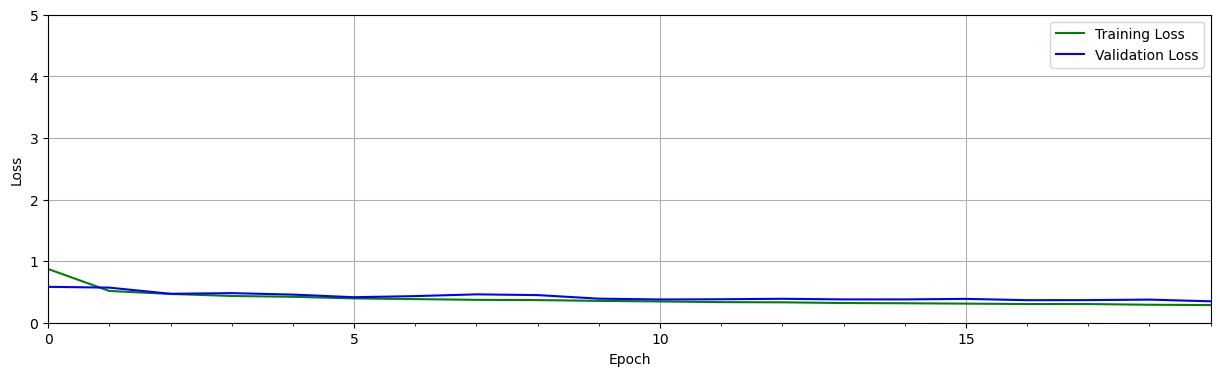

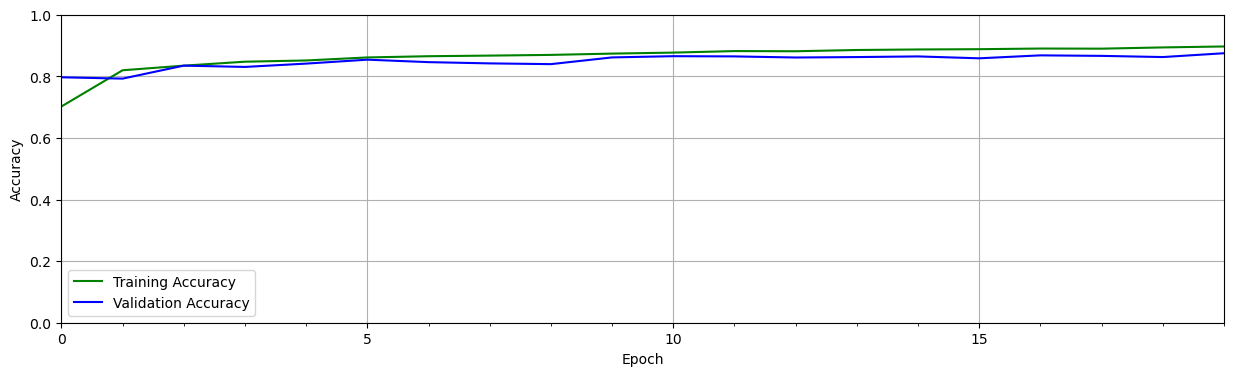


Training model with SGD without Momentum:
Epoch 1/20
165/165 [==============================] - 7s 20ms/step - loss: 1.6311 - accuracy: 0.5098 - val_loss: 1.1445 - val_accuracy: 0.6481
Epoch 2/20
165/165 [==============================] - 2s 13ms/step - loss: 0.9604 - accuracy: 0.6891 - val_loss: 0.8517 - val_accuracy: 0.7199
Epoch 3/20
165/165 [==============================] - 2s 12ms/step - loss: 0.7805 - accuracy: 0.7381 - val_loss: 0.7552 - val_accuracy: 0.7429
Epoch 4/20
165/165 [==============================] - 2s 12ms/step - loss: 0.6952 - accuracy: 0.7665 - val_loss: 0.6978 - val_accuracy: 0.7504
Epoch 5/20
165/165 [==============================] - 2s 13ms/step - loss: 0.6409 - accuracy: 0.7850 - val_loss: 0.6500 - val_accuracy: 0.7764
Epoch 6/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6033 - accuracy: 0.7959 - val_loss: 0.6347 - val_accuracy: 0.7762
Epoch 7/20
165/165 [==============================] - 2s 14ms/step - loss: 0.5752 - accuracy: 0.804

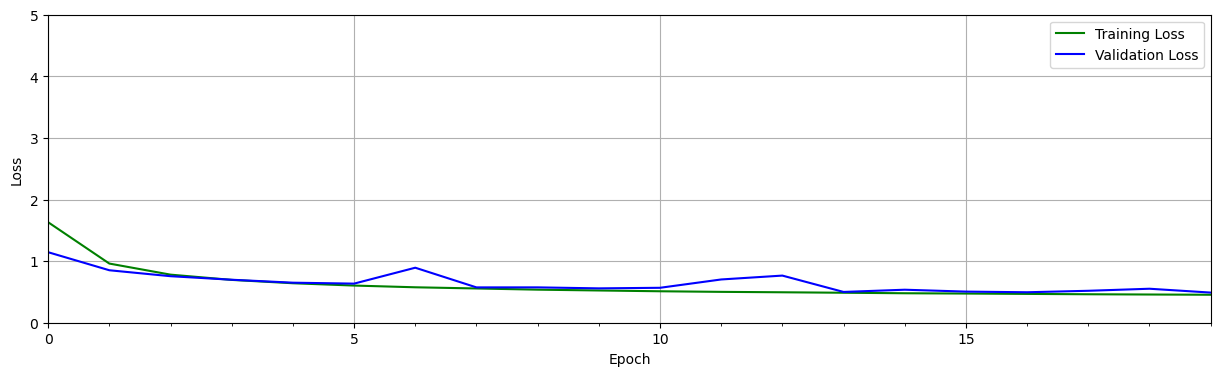

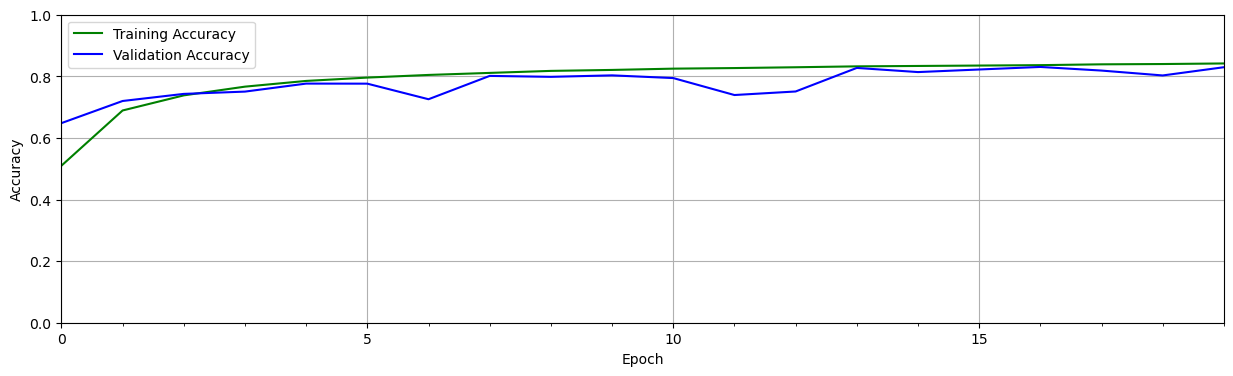


Training model with Mini-batch SGD:
Epoch 1/20
165/165 [==============================] - 7s 21ms/step - loss: 1.6039 - accuracy: 0.5102 - val_loss: 1.1241 - val_accuracy: 0.6537
Epoch 2/20
165/165 [==============================] - 2s 13ms/step - loss: 0.9489 - accuracy: 0.6900 - val_loss: 0.8540 - val_accuracy: 0.7156
Epoch 3/20
165/165 [==============================] - 2s 13ms/step - loss: 0.7751 - accuracy: 0.7410 - val_loss: 0.7685 - val_accuracy: 0.7267
Epoch 4/20
165/165 [==============================] - 2s 12ms/step - loss: 0.6924 - accuracy: 0.7704 - val_loss: 0.6884 - val_accuracy: 0.7788
Epoch 5/20
165/165 [==============================] - 2s 12ms/step - loss: 0.6398 - accuracy: 0.7873 - val_loss: 0.7209 - val_accuracy: 0.7556
Epoch 6/20
165/165 [==============================] - 2s 13ms/step - loss: 0.6039 - accuracy: 0.8002 - val_loss: 0.6871 - val_accuracy: 0.7453
Epoch 7/20
165/165 [==============================] - 2s 11ms/step - loss: 0.5761 - accuracy: 0.8080 - va

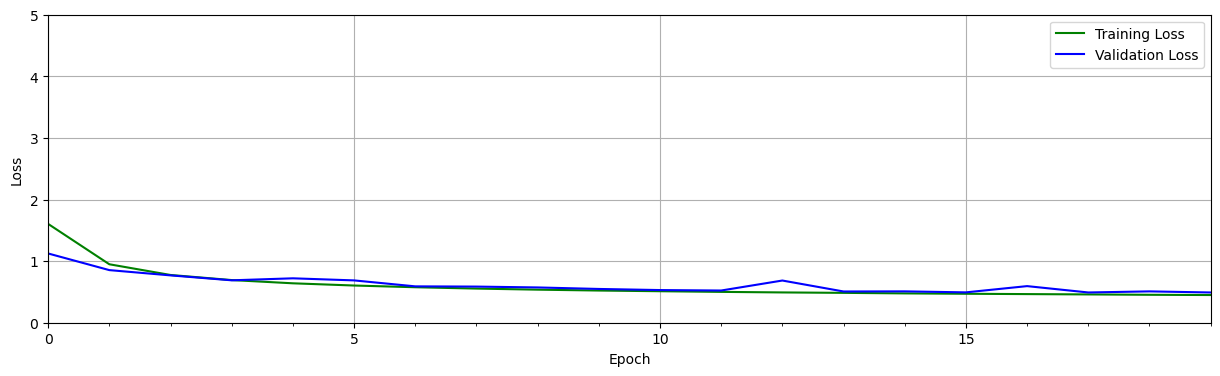

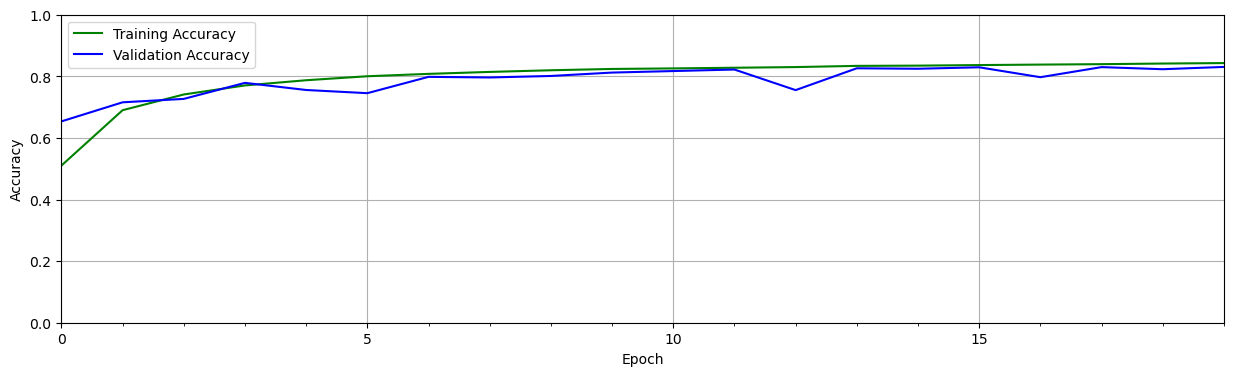


Training model with Full-batch SGD:
Epoch 1/20
165/165 [==============================] - 7s 20ms/step - loss: 1.6464 - accuracy: 0.5239 - val_loss: 1.1503 - val_accuracy: 0.6751
Epoch 2/20
165/165 [==============================] - 2s 12ms/step - loss: 0.9507 - accuracy: 0.7127 - val_loss: 0.8527 - val_accuracy: 0.7386
Epoch 3/20
165/165 [==============================] - 2s 13ms/step - loss: 0.7589 - accuracy: 0.7585 - val_loss: 0.7355 - val_accuracy: 0.7548
Epoch 4/20
165/165 [==============================] - 2s 13ms/step - loss: 0.6762 - accuracy: 0.7798 - val_loss: 0.6845 - val_accuracy: 0.7752
Epoch 5/20
165/165 [==============================] - 2s 12ms/step - loss: 0.6274 - accuracy: 0.7943 - val_loss: 0.6331 - val_accuracy: 0.7881
Epoch 6/20
165/165 [==============================] - 2s 14ms/step - loss: 0.5937 - accuracy: 0.8008 - val_loss: 0.6338 - val_accuracy: 0.7793
Epoch 7/20
165/165 [==============================] - 2s 11ms/step - loss: 0.5681 - accuracy: 0.8086 - va

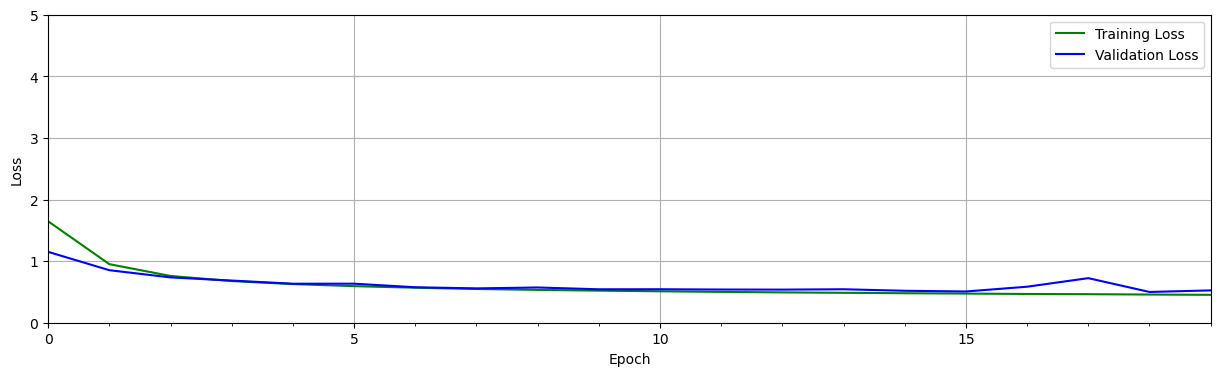

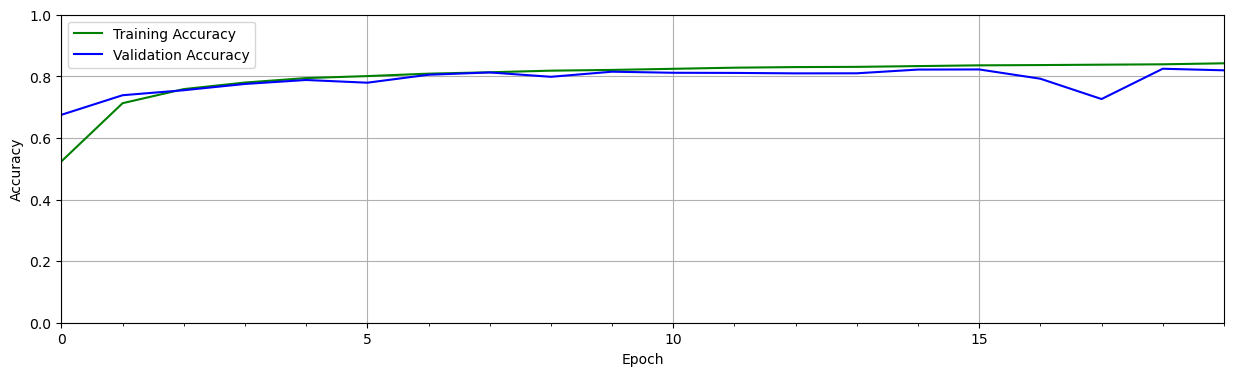


Training model with Stochastic SGD:
Epoch 1/20
165/165 [==============================] - 9s 26ms/step - loss: 1.6054 - accuracy: 0.5296 - val_loss: 1.1045 - val_accuracy: 0.6714
Epoch 2/20
165/165 [==============================] - 2s 12ms/step - loss: 0.9258 - accuracy: 0.7044 - val_loss: 0.8386 - val_accuracy: 0.7278
Epoch 3/20
165/165 [==============================] - 2s 14ms/step - loss: 0.7579 - accuracy: 0.7518 - val_loss: 0.7411 - val_accuracy: 0.7487
Epoch 4/20
165/165 [==============================] - 2s 12ms/step - loss: 0.6820 - accuracy: 0.7759 - val_loss: 0.6816 - val_accuracy: 0.7715
Epoch 5/20
165/165 [==============================] - 2s 14ms/step - loss: 0.6337 - accuracy: 0.7898 - val_loss: 0.6364 - val_accuracy: 0.7858
Epoch 6/20
165/165 [==============================] - 2s 14ms/step - loss: 0.5996 - accuracy: 0.8006 - val_loss: 0.6625 - val_accuracy: 0.7668
Epoch 7/20
165/165 [==============================] - 2s 13ms/step - loss: 0.5751 - accuracy: 0.8080 - va

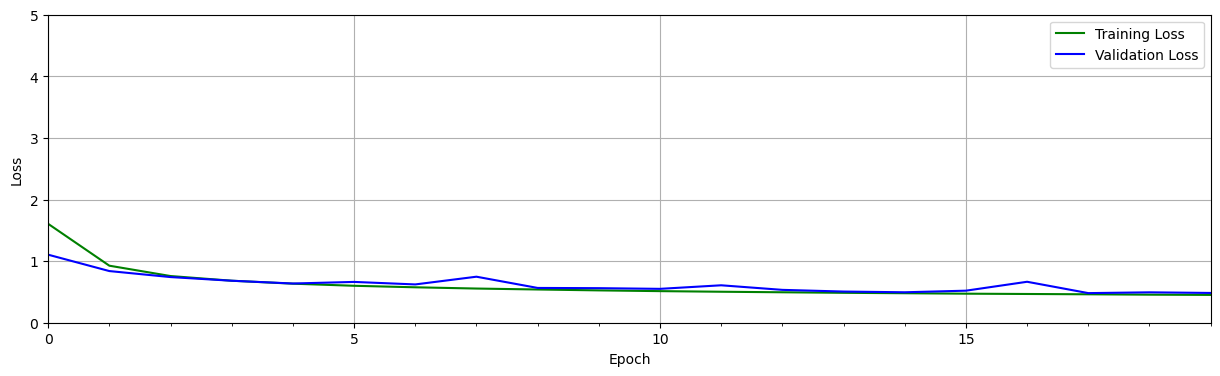

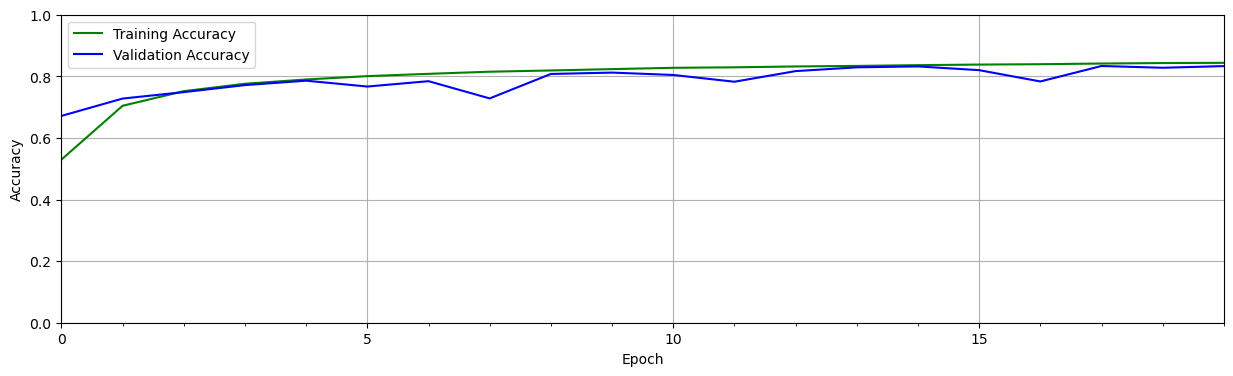


Training model with Adam:
Epoch 1/20
165/165 [==============================] - 15s 25ms/step - loss: 0.6553 - accuracy: 0.7735 - val_loss: 0.5145 - val_accuracy: 0.8181
Epoch 2/20
165/165 [==============================] - 2s 13ms/step - loss: 0.4357 - accuracy: 0.8459 - val_loss: 0.4426 - val_accuracy: 0.8437
Epoch 3/20
165/165 [==============================] - 2s 15ms/step - loss: 0.3894 - accuracy: 0.8625 - val_loss: 0.4165 - val_accuracy: 0.8533
Epoch 4/20
165/165 [==============================] - 2s 12ms/step - loss: 0.3668 - accuracy: 0.8674 - val_loss: 0.3952 - val_accuracy: 0.8573
Epoch 5/20
165/165 [==============================] - 3s 16ms/step - loss: 0.3435 - accuracy: 0.8748 - val_loss: 0.3682 - val_accuracy: 0.8695
Epoch 6/20
165/165 [==============================] - 3s 16ms/step - loss: 0.3248 - accuracy: 0.8823 - val_loss: 0.3744 - val_accuracy: 0.8671
Epoch 7/20
165/165 [==============================] - 2s 15ms/step - loss: 0.3114 - accuracy: 0.8879 - val_loss: 0

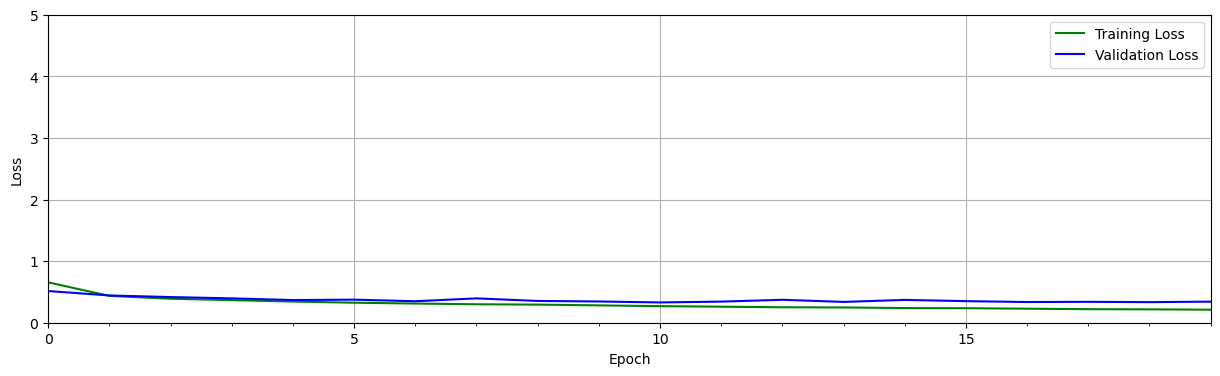

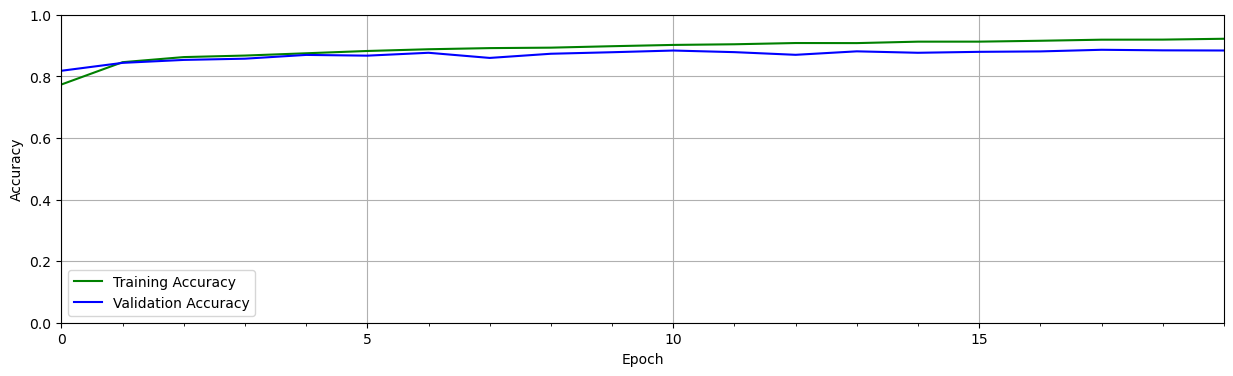

In [28]:


@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 20
    BATCH_SIZE: int = 256
    LEARNING_RATE: float = 0.001

@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 20
    BATCH_SIZE: int = 256
    LEARNING_RATE: float = 0.001

def model_1(input_shape=(784,), optimizer_type='sgd'):
    model = Sequential()
    model.add(Dense(units=128, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    if optimizer_type == 'sgd_momentum':
        optimizer = SGD(lr=0.01, momentum=0.9)
    elif optimizer_type == 'sgd':
        optimizer = SGD(lr=0.01)
    elif optimizer_type == 'adam':
        optimizer = Adam(lr=0.001)  # Adjust the learning rate as needed
    else:
        optimizer = optimizer_type
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model 


def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))
    
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

# Training with different optimizers and printing results
optimizers = ['sgd_momentum', 'sgd', SGD(lr=0.01, nesterov=False), SGD(lr=0.01, nesterov=True), 'sgd', 'adam']
optimizer_names = ['SGD with Momentum', 'SGD without Momentum', 'Mini-batch SGD', 'Full-batch SGD', 'Stochastic SGD', 'Adam']

for i, optimizer_type in enumerate(optimizers):
    model = model_1(input_shape=(784,), optimizer_type=optimizer_type)
    print(f"\nTraining model with {optimizer_names[i]}:")
    
    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=TrainingConfig.BATCH_SIZE,
                        epochs=TrainingConfig.EPOCHS,
                        verbose=1,
                        validation_split=0.3)
    
    # Evaluate and print accuracy
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Accuracy with {optimizer_names[i]}: {accuracy * 100:.2f}%")
    
    # Produce validation and learning curves
    train_loss = history.history["loss"]
    train_acc = history.history["accuracy"]
    valid_loss = history.history["val_loss"]
    valid_acc = history.history["val_accuracy"]

    plot_results([train_loss, valid_loss],
                 ylabel="Loss",
                 ylim=[0.0, 5.0],
                 metric_name=["Training Loss", "Validation Loss"],
                 color=["g", "b"])

    plot_results([train_acc, valid_acc],
                 ylabel="Accuracy",
                 ylim=[0.0, 1.0],
                 metric_name=["Training Accuracy", "Validation Accuracy"],
                 color=['g', 'b'])
